In [1]:
import psycopg2
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.colors as mcolors
from collections import defaultdict

# User Input Required

In [12]:
#Enter Regional Benchmark Name
region_name = 'Yorkshire and The Humber'

#Enter Local Authority Benchmark Name
local_authority_name = 'Leeds'

#Enter list of LSOAs for the study area
study_area_lsoa_list = ["E01011478", "E01011479", "E01011481", "E01011482", "E01011483",
    "E01011284", "E01011355", "E01011357", "E01011358", "E01011360",
    "E01011361", "E01011363", "E01011440", "E01011441", "E01011442",
    "E01011443", "E01011444", "E01011445", "E01011446", "E01011447",
    "E01011448", "E01011449", "E01011450", "E01011451", "E01011668",
    "E01011669", "E01011670", "E01011671", "E01011678", "E01011681",
    "E01011691", "E01011693", "E01033002", "E01033003", "E01033005",
    "E01033006", "E01033008", "E01033010", "E01033011", "E01033013",
    "E01033015", "E01033016", "E01033031", "E01033035", "E01032946"
]


#Enter file path for saving images
image_path=r'N:\2262_UoL MP Framework\WORKING\Graphics\Baseline Exports\Graphs'

# 1. Connect to Geodatabase

In [3]:
# --- DB connection params ---
conn_params = {
    'host': 'PRIORPSRV03',
    'port': 5432,
    'dbname': 'gis',    
}

# --- Connect to Postgres ---
conn = psycopg2.connect(**conn_params)

# 2. Run SQL query to retrive required data

In [4]:
import pandas as pd

# --- Define the single-layer query (choose the layer you want to load) ---
query = """
SELECT *
FROM uk_new.census2011_lsoa2011_students
"""

# --- Load the result into DataFrame ---
uk_deprivation = pd.read_sql_query(query, conn)
conn.close()

# --- Final preview ---
uk_deprivation.head()

C:\Users\abhimanya.achara\Anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,lsoa11cd,lsoa11nm,geometry,lsoa21cd,lsoa21nm,lad22cd,lad22nm,rgn22cd,rgn22nm,data_source,data_resolution,data_time_period,data_web_link,area_ha,total_students_count,total_students_age_4_15_count,total_students_age_16_17_count,total_students_age_18_19_count,total_students_age_20_24_count,total_students_age_25_above_count,total_students_age_4_15_perc,total_students_age_16_17_perc,total_students_age_18_19_perc,total_students_age_20_24_perc,total_students_age_25_above_perc,living_with_parents_count,living_in_communal_establishment_uni_count,living_in_communal_establishment_other_count,living_in_all_student_household_count,living_alone_count,living_in_other_household_count,living_with_parents_perc,living_in_communal_establishment_uni_perc,living_in_communal_establishment_other_perc,living_in_all_student_household_perc,living_alone_perc,living_in_other_household_perc,living_with_parents_age_4_15_count,living_in_communal_establishment_uni_age_4_15_count,living_in_communal_establishment_other_age_4_15_count,living_in_all_student_household_age_4_15_count,living_alone_age_4_15_count,living_in_other_household_age_4_15_count,living_with_parents_age_4_15_perc,living_in_communal_establishment_uni_age_4_15_perc,living_in_communal_establishment_other_age_4_15_perc,living_in_all_student_household_age_4_15_perc,living_alone_age_4_15_perc,living_in_other_household_age_4_15_perc,living_with_parents_age_16_17_count,living_in_communal_establishment_uni_age_16_17_count,living_in_communal_establishment_other_age_16_17_count,living_in_all_student_household_age_16_17_count,living_alone_age_16_17_count,living_in_other_household_age_16_17_count,living_with_parents_age_16_17_perc,living_in_communal_establishment_uni_age_16_17_perc,living_in_communal_establishment_other_age_16_17_perc,living_in_all_student_household_age_16_17_perc,living_alone_age_16_17_perc,living_in_other_household_age_16_17_perc,living_with_parents_age_18_19_count,living_in_communal_establishment_uni_age_18_19_count,living_in_communal_establishment_other_age_18_19_count,living_in_all_student_household_age_18_19_count,living_alone_age_18_19_count,living_in_other_household_age_18_19_count,living_with_parents_age_18_19_perc,living_in_communal_establishment_uni_age_18_19_perc,living_in_communal_establishment_other_age_18_19_perc,living_in_all_student_household_age_18_19_perc,living_alone_age_18_19_perc,living_in_other_household_age_18_19_perc,living_with_parents_age_20_24_count,living_in_communal_establishment_uni_age_20_24_count,living_in_communal_establishment_other_age_20_24_count,living_in_all_student_household_age_20_24_count,living_alone_age_20_24_count,living_in_other_household_age_20_24_count,living_with_parents_age_20_24_perc,living_in_communal_establishment_uni_age_20_24_perc,living_in_communal_establishment_other_age_20_24_perc,living_in_all_student_household_age_20_24_perc,living_alone_age_20_24_perc,living_in_other_household_age_20_24_perc,living_with_parents_age_25_above_count,living_in_communal_establishment_uni_age_25_above_count,living_in_communal_establishment_other_age_25_above_count,living_in_all_student_household_age_25_above_count,living_alone_age_25_above_count,living_in_other_household_age_25_above_count,living_with_parents_age_25_above_perc,living_in_communal_establishment_uni_age_25_above_perc,living_in_communal_establishment_other_age_25_above_perc,living_in_all_student_household_age_25_above_perc,living_alone_age_25_above_perc,living_in_other_household_age_25_above_perc,total_students_2021_count,change_instudent_population_10_yr
0,E01000034,Barking and Dagenham 003A,0106000020346C0000010000000103000000010000003F...,E01000034,Barking and Dagenham 003A,E09000002,Barking and Dagenham,E12000007,London,Census 2011 (ONS Nomis - Official Census and L...,LSOA 2011,2011-02-21,https://www.nomisweb.co.uk/,51.365911,353,248,51,26,15,13,70.254958,14.447592,7.365439,4.249292,3.682720,331,0,2,2,0,18,93.767705,0.0,0.566572,0.566572,0.000000,5.099150,245,0,0,0,0,3,98.790323,0.0,

In [7]:
# save as csv so no need to run SQL query again to save time
uk_deprivation.to_csv(r"N:\Geodatabase\Geodatabase Query Exports\uk_students.csv", index=False)

In [2]:
#reload data from csv
uk = pd.read_csv(r"N:\Geodatabase\Geodatabase Query Exports\uk_students.csv")

In [3]:
uk.columns.to_list()

['lsoa11cd',
 'lsoa11nm',
 'geometry',
 'lsoa21cd',
 'lsoa21nm',
 'lad22cd',
 'lad22nm',
 'rgn22cd',
 'rgn22nm',
 'data_source',
 'data_resolution',
 'data_time_period',
 'data_web_link',
 'area_ha',
 'total_students_count',
 'total_students_age_4_15_count',
 'total_students_age_16_17_count',
 'total_students_age_18_19_count',
 'total_students_age_20_24_count',
 'total_students_age_25_above_count',
 'total_students_age_4_15_perc',
 'total_students_age_16_17_perc',
 'total_students_age_18_19_perc',
 'total_students_age_20_24_perc',
 'total_students_age_25_above_perc',
 'living_with_parents_count',
 'living_in_communal_establishment_uni_count',
 'living_in_communal_establishment_other_count',
 'living_in_all_student_household_count',
 'living_alone_count',
 'living_in_other_household_count',
 'living_with_parents_perc',
 'living_in_communal_establishment_uni_perc',
 'living_in_communal_establishment_other_perc',
 'living_in_all_student_household_perc',
 'living_alone_perc',
 'living_in_o

In [10]:
uk.head()

,lsoa11cd,lsoa11nm,geometry,lsoa21cd,lsoa21nm,lad22cd,lad22nm,rgn22cd,rgn22nm,data_source,data_resolution,data_time_period,data_web_link,area_ha,total_students_count,total_students_age_4_15_count,total_students_age_16_17_count,total_students_age_18_19_count,total_students_age_20_24_count,total_students_age_25_above_count,total_students_age_4_15_perc,total_students_age_16_17_perc,total_students_age_18_19_perc,total_students_age_20_24_perc,total_students_age_25_above_perc,living_with_parents_count,living_in_communal_establishment_uni_count,living_in_communal_establishment_other_count,living_in_all_student_household_count,living_alone_count,living_in_other_household_count,living_with_parents_perc,living_in_communal_establishment_uni_perc,living_in_communal_establishment_other_perc,living_in_all_student_household_perc,living_alone_perc,living_in_other_household_perc,living_with_parents_age_4_15_count,living_in_communal_establishment_uni_age_4_15_count,living_in_communal_establishment_other_age_4_15_count,living_in_all_student_household_age_4_15_count,living_alone_age_4_15_count,living_in_other_household_age_4_15_count,living_with_parents_age_4_15_perc,living_in_communal_establishment_uni_age_4_15_perc,living_in_communal_establishment_other_age_4_15_perc,living_in_all_student_household_age_4_15_perc,living_alone_age_4_15_perc,living_in_other_household_age_4_15_perc,living_with_parents_age_16_17_count,living_in_communal_establishment_uni_age_16_17_count,living_in_communal_establishment_other_age_16_17_count,living_in_all_student_household_age_16_17_count,living_alone_age_16_17_count,living_in_other_household_age_16_17_count,living_with_parents_age_16_17_perc,living_in_communal_establishment_uni_age_16_17_perc,living_in_communal_establishment_other_age_16_17_perc,living_in_all_student_household_age_16_17_perc,living_alone_age_16_17_perc,living_in_other_household_age_16_17_perc,living_with_parents_age_18_19_count,living_in_communal_establishment_uni_age_18_19_count,living_in_communal_establishment_other_age_18_19_count,living_in_all_student_household_age_18_19_count,living_alone_age_18_19_count,living_in_other_household_age_18_19_count,living_with_parents_age_18_19_perc,living_in_communal_establishment_uni_age_18_19_perc,living_in_communal_establishment_other_age_18_19_perc,living_in_all_student_household_age_18_19_perc,living_alone_age_18_19_perc,living_in_other_household_age_18_19_perc,living_with_parents_age_20_24_count,living_in_communal_establishment_uni_age_20_24_count,living_in_communal_establishment_other_age_20_24_count,living_in_all_student_household_age_20_24_count,living_alone_age_20_24_count,living_in_other_household_age_20_24_count,living_with_parents_age_20_24_perc,living_in_communal_establishment_uni_age_20_24_perc,living_in_communal_establishment_other_age_20_24_perc,living_in_all_student_household_age_20_24_perc,living_alone_age_20_24_perc,living_in_other_household_age_20_24_perc,living_with_parents_age_25_above_count,living_in_communal_establishment_uni_age_25_above_count,living_in_communal_establishment_other_age_25_above_count,living_in_all_student_household_age_25_above_count,living_alone_age_25_above_count,living_in_other_household_age_25_above_count,living_with_parents_age_25_above_perc,living_in_communal_establishment_uni_age_25_above_perc,living_in_communal_establishment_other_age_25_above_perc,living_in_all_student_household_age_25_above_perc,living_alone_age_25_above_perc,living_in_other_household_age_25_above_perc,total_students_2021_count,change_instudent_population_10_yr
0,E01000034,Barking and Dagenham 003A,0106000020346C0000010000000103000000010000003F...,E01000034,Barking and Dagenham 003A,E09000002,Barking and Dagenham,E12000007,London,Census 2011 (ONS Nomis - Official Census and L...,LSOA 2011,2011-02-21,https://www.nomisweb.co.uk/,51.365911,353,248,51,26,15,13,70.254958,14.447592,7.365439,4.249292,3.682720,331,0,2,2,0,18,93.767705,0.0,0.566572,0.566572,0.000000,5.099150,245,0,0,0,0,3,98.790323,0.0,

In [8]:
# Living with parents
uk['living_with_parents_18_plus_count'] = (
    uk['living_with_parents_age_18_19_count'] +
    uk['living_with_parents_age_20_24_count'] +
    uk['living_with_parents_age_25_above_count']     
)

# Living in communal establishment (university)
uk['living_in_communal_establishment_uni_18_plus_count'] = (
    uk['living_in_communal_establishment_uni_age_18_19_count'] +
    uk['living_in_communal_establishment_uni_age_20_24_count'] +
    uk['living_in_communal_establishment_uni_age_25_above_count']     
)

# Living in communal establishment (other)
uk['living_in_communal_establishment_other_18_plus_count'] = (
    uk['living_in_communal_establishment_other_age_18_19_count'] +
    uk['living_in_communal_establishment_other_age_20_24_count'] +
    uk['living_in_communal_establishment_other_age_25_above_count'] 
)

# Living in all-student household
uk['living_in_all_student_household_18_plus_count'] = (
    uk['living_in_all_student_household_age_18_19_count'] +
    uk['living_in_all_student_household_age_20_24_count'] +
    uk['living_in_all_student_household_age_25_above_count'] 
)

# Living alone
uk['living_alone_18_plus_count'] = (
    uk['living_alone_age_18_19_count'] +
    uk['living_alone_age_20_24_count'] +
    uk['living_alone_age_25_above_count'] 
)

# Living in other household
uk['living_in_other_household_18_plus_count'] = (
    uk['living_in_other_household_age_18_19_count'] +
    uk['living_in_other_household_age_20_24_count'] +
    uk['living_in_other_household_age_25_above_count'] 
)


# 3. Clean up retrived data

In [9]:
columns_to_keep = [
    # Identifier
    'lsoa21cd',
    'lad22nm',
    'rgn22nm',
    
    # Student living arrangements
    'living_with_parents_count',
    'living_in_communal_establishment_uni_count',
    'living_in_communal_establishment_other_count',
    'living_in_all_student_household_count',
    'living_alone_count',
    'living_in_other_household_count',
    
    # Student living arrangements 18+
    'living_with_parents_18_plus_count',
    'living_in_communal_establishment_uni_18_plus_count',
    'living_in_communal_establishment_other_18_plus_count',
    'living_in_all_student_household_18_plus_count',
    'living_alone_18_plus_count',
    'living_in_other_household_18_plus_count',
    
]


In [10]:
uk_df = uk[columns_to_keep]
uk_df.head()

,lsoa21cd,lad22nm,rgn22nm,living_with_parents_count,living_in_communal_establishment_uni_count,living_in_communal_establishment_other_count,living_in_all_student_household_count,living_alone_count,living_in_other_household_count,living_with_parents_18_plus_count,living_in_communal_establishment_uni_18_plus_count,living_in_communal_establishment_other_18_plus_count,living_in_all_student_household_18_plus_count,living_alone_18_plus_count,living_in_other_household_18_plus_count
0,E01000034,Barking and Dagenham,London,331,0,2,2,0,18,38,0,2,2,0,12
1,E01000035,Barking and Dagenham,London,358,0,6,5,7,25,58,0,4,5,7,15
2,E01000036,Barking and Dagenham,London,272,0,0,6,1,38,34,0,0,4,0,28
3,E01000037,Barking and Dagenham,London,290,0,9,3,1,14,43,0,9,3,1,10
4,E01000038,Barking and Dagenham,London,299,0,0,3,1,15,38,0,0,3,1,14


In [13]:
# 1. england_df_cleaned where rgn22nm is not null
england_df = uk_df[uk_df['rgn22nm'].notnull()]

# 2. region_df where rgn22nm = "Yorkshire and The Humber"
region_df = uk_df[uk_df['rgn22nm'] == region_name]

# 3. leeds_df where lad22nm = "Leeds"
leeds_df = uk_df[uk_df['lad22nm'] == local_authority_name]

# 4. study_area_df where lsoa21cd is in a specific list
study_area_df = uk_df[uk_df['lsoa21cd'].isin(study_area_lsoa_list)]


# Define functions to plot graphs

In [14]:
def plot_bar_chart(
    study_area_df, leeds_df, region_df, england_df,
    selected_cols,
    chart_title='Qualification Breakdown',
    x_axis_label='Mean value',
    font_family='Arial',
    title_fontsize=20,
    axis_label_fontsize=16,
    tick_fontsize=14,
    label_fontsize=12,
    label_fontweight='bold',
    legend_title=None,
    legend_title_fontsize=14,
    legend_fontsize=12,
    legend_ncol=3,
    legend_y_offset=-0.15,
    legend_location='lower center',
    legend_location_x=0.5,
    legend_location_y=-0.15,
    show_legend=True, 
    text_color='white',
    background_color='#111',
    label_threshold=3,
    image_width=12,
    image_height=6,
    save_image=False,
    image_path=None,
    image_name='chart_output.png',
    dpi=300
):
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import pandas as pd
    import numpy as np
    import os

    def format_category(name):
        return name.replace('_count', '').replace('_', ' ').capitalize()

    def prep(df, label, selected_cols):
        means = df[selected_cols].mean()
        return pd.DataFrame({
            'Category': selected_cols,
            'Proportion': means.values,
            'Area': label
        })

    data = pd.concat([
        prep(study_area_df, 'Study Area', selected_cols),
        prep(leeds_df, 'Leeds', selected_cols),
        prep(region_df, 'Yorkshire and The Humber', selected_cols),
        prep(england_df, 'England', selected_cols)
    ])
    data['Category'] = data['Category'].apply(format_category)

    pivot_df = data.pivot(index='Area', columns='Category', values='Proportion')
    pivot_df = pivot_df.loc[['Study Area', 'Leeds', 'Yorkshire and The Humber', 'England']]
    category_order = [format_category(col) for col in selected_cols]

    red_cmap = mcolors.LinearSegmentedColormap.from_list("custom_red", ["#ffcccc", "#800000"])
    norm = mcolors.Normalize(vmin=pivot_df[category_order].min().min(), vmax=pivot_df[category_order].max().max())

    plt.rcParams['font.family'] = font_family
    fig, ax = plt.subplots(figsize=(image_width, image_height), facecolor=background_color)
    ax.set_facecolor(background_color)

    bottom = [0] * len(pivot_df)
    for cat in category_order:
        values = pivot_df[cat].values
        bar_colors = [red_cmap(norm(val)) for val in values]
        bars = ax.barh(
            pivot_df.index,
            values,
            left=bottom,
            color=bar_colors,
            edgecolor='none',
            label=cat
        )
        for bar, val in zip(bars, values):
            if val > label_threshold:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + bar.get_height() / 2,
                    f"{val:.0f}",
                    ha='center',
                    va='center',
                    color=text_color,
                    fontsize=label_fontsize,
                    fontweight=label_fontweight
                )
        bottom = [b + v for b, v in zip(bottom, values)]

    max_total = pivot_df.sum(axis=1).max()
    ax.set_xlim(0, max_total * 1.05)

    ax.set_xlabel(x_axis_label, fontsize=axis_label_fontsize, color=text_color, labelpad=10)
    ax.set_title(chart_title, fontsize=title_fontsize, color=text_color, pad=20)
    ax.tick_params(colors=text_color, labelsize=tick_fontsize)
    ax.set_ylabel('')
    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    # ✅ Only show legend if enabled
    if show_legend:
        legend = ax.legend(
            title=legend_title,
            title_fontsize=legend_title_fontsize if legend_title else None,
            fontsize=legend_fontsize,
            loc=legend_location,
            bbox_to_anchor=(legend_location_x, legend_location_y),
            ncol=legend_ncol,
            frameon=False,
            labelcolor=text_color
        )

        plt.setp(legend.get_texts(), color=text_color)
        if legend.get_title():
            legend.get_title().set_color(text_color)

    plt.tight_layout()

    if save_image and image_path:
        os.makedirs(image_path, exist_ok=True)
        full_path = os.path.join(image_path, image_name)
        plt.savefig(full_path, dpi=dpi, bbox_inches='tight', facecolor=fig.get_facecolor())
        print(f"Chart saved to: {full_path}")

    plt.show()


In [18]:
def plot_stacked_bar_chart(
    study_area_df, leeds_df, region_df, england_df,
    selected_cols,
    chart_title='Qualification Breakdown',
    x_axis_label='% of population',
    color_palette=None,
    auto_color_by_group=True,
    data_specific_palette=None,
    font_family='Arial',
    title_fontsize=20,
    axis_label_fontsize=16,
    tick_fontsize=14,
    label_fontsize=12,
    label_fontweight='bold',    
    legend_title=None,
    legend_title_fontsize=14,
    legend_fontsize=12,
    legend_ncol=3,
    legend_y_offset=-0.15,
    legend_location='lower center',
    legend_location_x=0.5,
    legend_location_y=-0.15,
    legend_label_colour='white',
    background_color='#111',
    label_threshold=3,
    image_width=12,
    image_height=6,
    save_image=False,
    image_path=image_path,
    image_name='chart_output.png',
    dpi=300
):
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import pandas as pd
    import os
    from collections import defaultdict

    fallback_palette = [
        '#ff7fbc', '#b53189', '#9c7cc9', '#2d1f70', '#8ebce6',
        '#d5e4f2', '#B7A6FF', '#88FFB8', '#292627',
        '#fcb0d9', '#c25a9b', '#a8a5e0', '#3f2e86', '#a7d1ef',
        '#b4a0d9', '#5d4482', '#cdeff0', '#dee6f8', '#6d758d'
    ]

    def get_group_name(col_name, palette_groups):
        for group in palette_groups:
            if col_name.startswith(group):
                return group
        return 'other'

    def auto_generate_color_palette(selected_cols, data_specific_palette):
        group_to_cols = defaultdict(list)
        for col in selected_cols:
            group = get_group_name(col.replace('_count', ''), data_specific_palette)
            group_to_cols[group].append(col)

        final_palette = {}
        for group, cols in group_to_cols.items():
            base_color = data_specific_palette.get(group, '#999999')
            cmap = mcolors.LinearSegmentedColormap.from_list('cmap', ['white', base_color])
            shades = [mcolors.to_hex(cmap(i / (len(cols) + 1))) for i in range(1, len(cols) + 1)]
            for col, shade in zip(cols, shades):
                final_palette[col] = shade
        return final_palette

    # Apply color palette based on priority
    if data_specific_palette:  # SCENARIO 3
        color_palette = auto_generate_color_palette(selected_cols, data_specific_palette)
    elif color_palette:        # SCENARIO 2
        color_palette = color_palette
    else:                      # SCENARIO 1
        color_palette = {
            col: fallback_palette[i % len(fallback_palette)]
            for i, col in enumerate(selected_cols)
        }

    def prep(df, label, selected_cols):
        totals = df[selected_cols].sum()
        total_sum = totals.sum()
        proportions = (totals / total_sum) * 100
        return pd.DataFrame({
            'Category': selected_cols,
            'Proportion': proportions.values,
            'Area': label
        })

    def format_category(name):
        return name.replace('_count', '').replace('_', ' ').capitalize()

    data = pd.concat([
        prep(study_area_df, 'Study Area', selected_cols),
        prep(leeds_df, 'Leeds', selected_cols),
        prep(region_df, 'Yorkshire and The Humber', selected_cols),
        prep(england_df, 'England', selected_cols)
    ])
    data['Category'] = data['Category'].apply(format_category)

    pivot_df = data.pivot(index='Area', columns='Category', values='Proportion')
    pivot_df = pivot_df.loc[['Study Area', 'Leeds', 'Yorkshire and The Humber', 'England']]
    category_order = [format_category(col) for col in selected_cols]
    color_lookup = {format_category(k): v for k, v in color_palette.items()}

    plt.rcParams['font.family'] = font_family
    fig, ax = plt.subplots(figsize=(image_width, image_height), facecolor=background_color)
    ax.set_facecolor(background_color)

    bottom = [0] * len(pivot_df)
    for i, cat in enumerate(category_order):
        values = pivot_df[cat].values
        bars = ax.barh(
            pivot_df.index,
            values,
            left=bottom,
            color=color_lookup.get(cat, '#ccc'),
            label=cat,
            edgecolor='none'
        )
        for bar, val in zip(bars, values):
            if val > label_threshold:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + bar.get_height() / 2,
                    f"{val:.0f}%",
                    ha='center',
                    va='center',
                    color='white',
                    fontsize=label_fontsize,
                    fontweight=label_fontweight
                )
        bottom = [b + v for b, v in zip(bottom, values)]

    ax.set_xlim(0, 100)
    ax.set_xlabel(x_axis_label, fontsize=axis_label_fontsize, color='white', labelpad=10)
    ax.set_title(chart_title, fontsize=title_fontsize, color='white', pad=20)
    ax.tick_params(colors='white', labelsize=tick_fontsize)
    ax.set_ylabel('')
    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    
    legend = ax.legend(
        title=legend_title,
        title_fontsize=legend_title_fontsize if legend_title else None,
        fontsize=legend_fontsize,
        loc=legend_location,
        bbox_to_anchor=(legend_location_x, legend_location_y),
        ncol=legend_ncol,
        frameon=False,
        labelcolor=legend_label_colour
    )

    # Format legend labels to sentence case with spaces
    new_labels = [label.replace('_', ' ').capitalize() for label in summary_df.columns]
    for text, new_label in zip(legend.get_texts(), new_labels):
        text.set_text(new_label)
        text.set_color(legend_label_colour)

    if legend.get_title():
        legend.get_title().set_color(legend_label_colour)

    plt.tight_layout()

    if save_image:
        os.makedirs(image_path, exist_ok=True)
        full_path = os.path.join(image_path, image_name)
        plt.savefig(full_path, dpi=dpi, bbox_inches='tight', facecolor=fig.get_facecolor())
        print(f"Chart saved to: {full_path}")

    plt.show()


In [16]:
def plot_bar_chart(
    study_area_df, leeds_df, region_df, england_df,
    selected_cols,
    proportion_column=None,  # NEW ARGUMENT
    chart_title='Qualification Breakdown',
    x_axis_label='Mean % change',
    font_family='Arial',
    title_fontsize=20,
    axis_label_fontsize=16,
    tick_fontsize=14,
    label_fontsize=12,
    label_fontweight='bold',
    legend_title=None,
    legend_title_fontsize=14,
    legend_fontsize=12,
    legend_ncol=3,
    legend_y_offset=-0.15,
    legend_location='lower center',
    legend_location_x=0.5,
    legend_location_y=-0.15,
    show_legend=True,
    text_color='white',
    background_color='#111',
    label_threshold=3,
    image_width=12,
    image_height=6,
    save_image=False,
    image_path=None,
    image_name='chart_output.png',
    dpi=300
):
    import matplotlib.pyplot as plt
    import matplotlib.colors as mcolors
    import pandas as pd
    import numpy as np
    import os

    def format_category(name):
        return name.replace('_count', '').replace('_', ' ').capitalize()

    def prep(df, label, selected_cols):
        if proportion_column and proportion_column in df.columns:
            # Calculate (value / proportion_column) * 100 for each selected col
            calculated = df[selected_cols].div(df[proportion_column], axis=0) * 100
            means = calculated.mean()
        else:
            means = df[selected_cols].mean()

        return pd.DataFrame({
            'Category': selected_cols,
            'Proportion': means.values,
            'Area': label
        })

    data = pd.concat([
        prep(study_area_df, 'Study Area', selected_cols),
        prep(leeds_df, 'Leeds', selected_cols),
        prep(region_df, 'Yorkshire and The Humber', selected_cols),
        prep(england_df, 'England', selected_cols)
    ])
    data['Category'] = data['Category'].apply(format_category)

    pivot_df = data.pivot(index='Area', columns='Category', values='Proportion')
    pivot_df = pivot_df.loc[['Study Area', 'Leeds', 'Yorkshire and The Humber', 'England']]
    category_order = [format_category(col) for col in selected_cols]

    red_cmap = mcolors.LinearSegmentedColormap.from_list("custom_red", ["#ffcccc", "#800000"])
    norm = mcolors.Normalize(vmin=pivot_df[category_order].min().min(), vmax=pivot_df[category_order].max().max())

    plt.rcParams['font.family'] = font_family
    fig, ax = plt.subplots(figsize=(image_width, image_height), facecolor=background_color)
    ax.set_facecolor(background_color)

    bottom = [0] * len(pivot_df)
    for cat in category_order:
        values = pivot_df[cat].values
        bar_colors = [red_cmap(norm(val)) for val in values]
        bars = ax.barh(
            pivot_df.index,
            values,
            left=bottom,
            color=bar_colors,
            edgecolor='none',
            label=cat
        )
        for bar, val in zip(bars, values):
            if abs(val) > label_threshold:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + bar.get_height() / 2,
                    f"{val:.1f}%",
                    ha='center',
                    va='center',
                    color=text_color,
                    fontsize=label_fontsize,
                    fontweight=label_fontweight
                )
        bottom = [b + v for b, v in zip(bottom, values)]

    max_total = pivot_df.sum(axis=1).max()
    ax.set_xlim(0, max_total * 1.05)

    ax.set_xlabel(x_axis_label, fontsize=axis_label_fontsize, color=text_color, labelpad=10)
    ax.set_title(chart_title, fontsize=title_fontsize, color=text_color, pad=20)
    ax.tick_params(colors=text_color, labelsize=tick_fontsize)
    ax.set_ylabel('')
    ax.grid(False)

    for spine in ax.spines.values():
        spine.set_visible(False)

    if show_legend:
        legend = ax.legend(
            title=legend_title,
            title_fontsize=legend_title_fontsize if legend_title else None,
            fontsize=legend_fontsize,
            loc=legend_location,
            bbox_to_anchor=(legend_location_x, legend_location_y),
            ncol=legend_ncol,
            frameon=False,
            labelcolor=text_color
        )
        plt.setp(legend.get_texts(), color=text_color)
        if legend.get_title():
            legend.get_title().set_color(text_color)

    plt.tight_layout()

    if save_image and image_path:
        os.makedirs(image_path, exist_ok=True)
        full_path = os.path.join(image_path, image_name)
        plt.savefig(full_path, dpi=dpi, bbox_inches='tight', facecolor=fig.get_facecolor())
        print(f"Chart saved to: {full_path}")

    plt.show()


# Accommodation type

NameError: name 'summary_df' is not defined

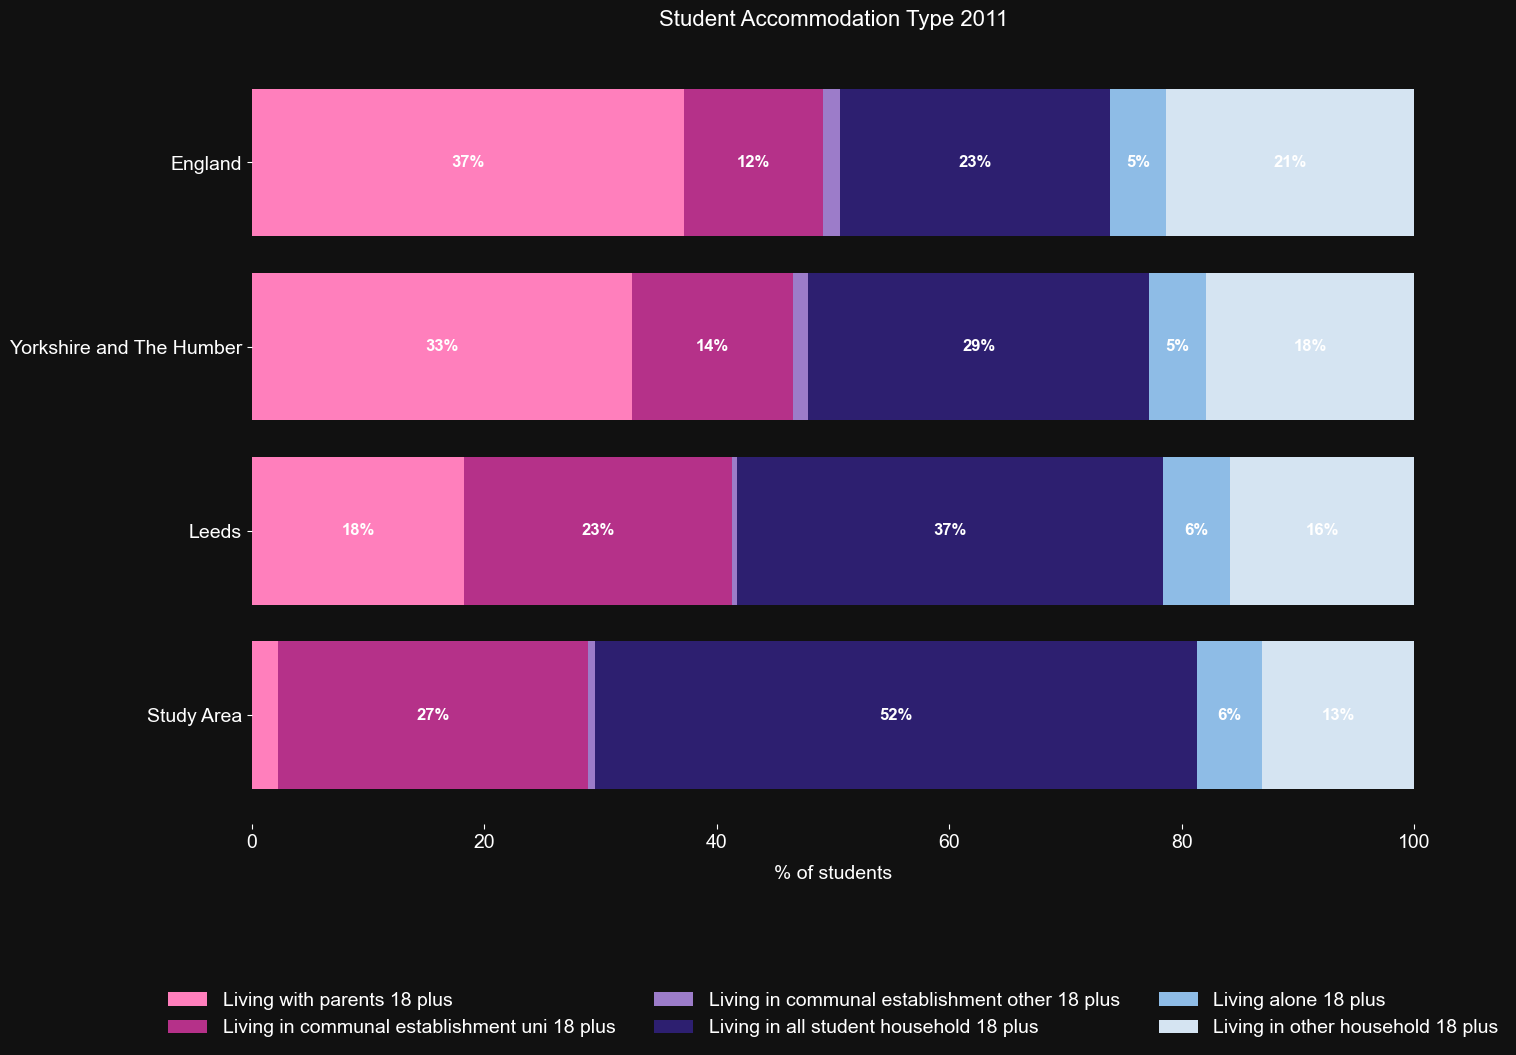

In [20]:
selected_cols = [    
    'living_with_parents_18_plus_count',
    'living_in_communal_establishment_uni_18_plus_count',
    'living_in_communal_establishment_other_18_plus_count',
    'living_in_all_student_household_18_plus_count',
    'living_alone_18_plus_count',
    'living_in_other_household_18_plus_count'
]

plot_stacked_bar_chart(
    study_area_df, leeds_df, region_df, england_df,
    selected_cols,
    chart_title='Student Accommodation Type 2011',
    x_axis_label='% of students',
    color_palette=None,
    auto_color_by_group=True,
    data_specific_palette=None,
    font_family='Arial',
    title_fontsize=16,
    axis_label_fontsize=14,
    tick_fontsize=14,
    label_fontsize=12,
    label_fontweight='bold',
    legend_title=None,
    legend_title_fontsize=14,
    legend_fontsize=14,
    legend_ncol=3,
    legend_y_offset=-0.3,
    legend_location='lower center',
    legend_location_x=0.5,
    legend_location_y=-0.3,
    legend_label_colour='white',
    background_color='#111',
    label_threshold=3,
    image_width=15,
    image_height=10,
    save_image=True,
    image_path=image_path,
    image_name='Student Accommodation Type 2011.png' # file name
)
